# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [7]:
data=pd.read_csv ('real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


## Create the regression

### Declare the dependent and the independent variables

In [9]:
x = data['size']
y= data['price']

### Explore the data

In [19]:
x.shape
x_matrix = x.values.reshape (-1,1)
x_matrix.shape

(100, 1)

### Transform the inputs into a matrix (2D object)

In [12]:
y.shape

(100,)

### Regression itself

In [21]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Calculate the R-squared

In [22]:
reg.score (x_matrix, y)

0.7447391865847587

### Find the intercept

In [25]:
reg.intercept_

101912.60180122915

### Find the coefficients

In [30]:
reg.coef_

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [37]:
new_data = pd.DataFrame (data=[750,1000], columns=['size'])
new_data

,size
0,750
1,1000


In [38]:
reg.predict(new_data)

array([269296.65874718, 325091.34439584])

In [39]:
new_data['Predicted_Price'] = reg.predict(new_data)
new_data

,size,Predicted_Price
0,750,269296.658747
1,1000,325091.344396


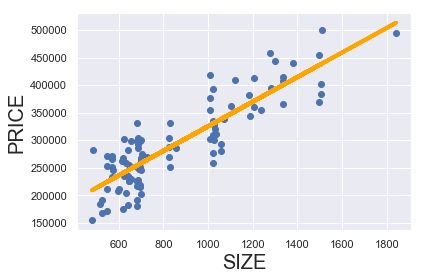

In [40]:
plt.scatter(x,y)
yhat=reg.coef_*x_matrix +reg.intercept_
fig= plt.plot (x, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SIZE', fontsize=20)
plt.ylabel('PRICE', fontsize=20)
plt.show()